In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
url = "https://data.humdata.org/dataset/5b184049-f8ee-4b55-a867-1409de538ff8/resource/33f303b8-4557-424e-8205-227b889f00e5/download/wfp_food_prices_turkey.csv"
TurkeyFoodPrice = pd.read_csv(url)
#remove first row because it is a header row
TurkeyFoodPrice = TurkeyFoodPrice.iloc[1:]
TurkeyFoodPrice

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
1,2013-05-15,Rice - Retail,KG,cereals and tubers,4.492,TRY,Turkey,NaN,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5,NaN
2,2013-06-15,Rice - Retail,KG,cereals and tubers,4.5786,TRY,Turkey,NaN,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5,NaN
3,2013-11-15,Rice - Retail,KG,cereals and tubers,4.7865,TRY,Turkey,NaN,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5,NaN
4,2013-12-15,Rice - Retail,KG,cereals and tubers,5.1337,TRY,Turkey,NaN,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5,NaN
5,2014-01-15,Rice - Retail,KG,cereals and tubers,5.5099,TRY,Turkey,NaN,0,National Average,1319.0,52,15.0,5.0,1,1319_52_15_5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10479,2021-02-15,Cocoa (powder) - Retail,KG,miscellaneous food,68.625,TRY,Turkey,NaN,3057,Izmir,2055.0,502,15.0,5.0,7,2055_502_15_5,NaN
10480,2021-03-15,Cocoa (powder) - Retail,KG,miscellaneous food,71.231,TRY,Turkey,NaN,3057,Izmir,2055.0,502,15.0,5.0,7,2055_502_15_5,NaN
10481,2021-04-15,Cocoa (powder) - Retail,KG,miscellaneous food,73.2609,TRY,Turkey,NaN,3057,Izmir,2055.0,502,15.0,5.0,7,2055_502_15_5,NaN
10482,2021-05-15,Cocoa (powder) - Retail,KG,miscellaneous food,75.6859,TRY,Turkey,NaN,3057,Izmir,2055.0,502,15.0,5.0,7,2055_502_15_5,NaN


In [3]:
TurkeyFoodPrice.describe()

,mktid,ptid,umid,default
count,10483.000000,10483.0,10483.000000,0.0
mean,1815.123343,15.0,15.464943,NaN
std,344.273310,0.0,25.818588,NaN
min,1319.000000,15.0,5.000000,NaN
25%,1319.000000,15.0,5.000000,NaN
50%,2053.000000,15.0,5.000000,NaN
75%,2054.000000,15.0,5.000000,NaN
max,2055.000000,15.0,102.000000,NaN


In [4]:
Rice_Retail = TurkeyFoodPrice[TurkeyFoodPrice["cmname"] == "Rice - Retail"]
#drop the columns which has no value
Rice_Retail=Rice_Retail.dropna(axis=1,how='all')

In [5]:
Rice_Retail_2 = Rice_Retail[["date", "price","mktname"]]

#convert price from object to numeric
Rice_Retail_2["price"] = pd.to_numeric(Rice_Retail_2["price"],errors = 'coerce')
Rice_Retail_2['year'] = pd.DatetimeIndex(Rice_Retail_2['date']).year
Rice_Retail_2

/Users/nagihan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/nagihan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date,price,mktname,year
1,2013-05-15,4.4920,National Average,2013
2,2013-06-15,4.5786,National Average,2013
3,2013-11-15,4.7865,National Average,2013
4,2013-12-15,5.1337,National Average,2013
5,2014-01-15,5.5099,National Average,2014
...,...,...,...,...
8174,2021-02-15,13.2235,Izmir,2021
8175,2021-03-15,13.4700,Izmir,2021
8176,2021-04-15,13.3449,Izmir,2021
8177,2021-05-15,13.4948,Izmir,2021


In [6]:
#return to pivot table to compare National Average price with the other cities
pivot_table = pd.pivot_table(Rice_Retail_2,index="year", columns=["mktname"], values = ["price"])
pivot_table = pivot_table.dropna()
pivot_table

price                                       
mktname     Ankara   Istanbul      Izmir National Average
year                                                     
2017      6.768867   7.495025   7.508350         6.053333
2018      8.074508   9.069283   9.045750         8.372233
2019      8.563417   9.784017  10.003417         9.187408
2020     10.208900  11.622933  11.273183        10.758508
2021     11.835567  13.779917  13.349417        12.714800

No handles with labels found to put in legend.


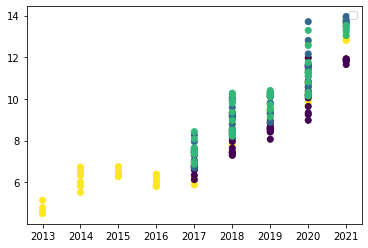

In [7]:
#we converting it into categorical data
cat_col = Rice_Retail_2['mktname'].astype('category') 

#we are getting codes for it 
cat_col = cat_col.cat.codes 

# we are using c parameter to change the color.
plt.scatter(Rice_Retail_2["year"],Rice_Retail_2["price"], c=cat_col) 
plt.legend()


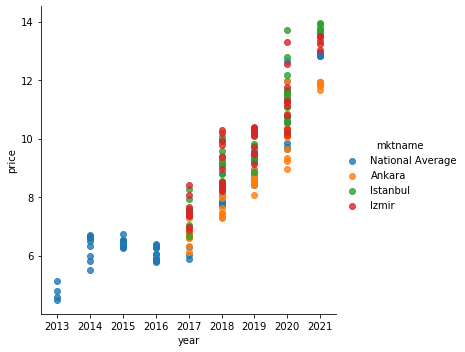

In [8]:
#seaborn plot
sns.lmplot(x='year', y ='price', hue ='mktname',data=Rice_Retail_2, fit_reg=False)


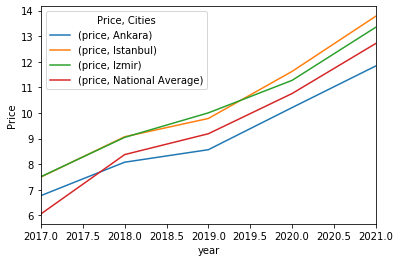

In [9]:
x = pivot_table.plot(label="Price - Cities")
x.set_ylabel("Price")
x.legend(title = "Price, Cities")

Rice Prices in Ankara is always under National Average but it is not true for Istanbul and Izmir. Although Ankara is bigger than Izmir, why is the price in Izmir higher than in Ankara?

In [13]:
TFP = TurkeyFoodPrice[["category", "cmname","price","mktname","date"]]
TFP['year'] = pd.DatetimeIndex(TFP['date']).year

/Users/nagihan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
TFP_groupfirst = TFP.groupby(["year","mktname","cmname"]).agg({"price":"first","date":"min"})
TFP_groupfirst = TFP_groupfirst.rename(columns={"price":"price_first", "date":"date_first"})

In [73]:
TFP_grouplast = TFP.groupby(["year","mktname","cmname"]).agg({"price":"last","date":"max"})
TFP_grouplast = TFP_grouplast.rename(columns={"price":"price_last", "date":"date_last"})

In [74]:
TFP_grouplast.reset_index()

,year,mktname,cmname,price_last,date_last
0,2013,National Average,Apples (red) - Retail,1.8533,2013-12-15
1,2013,National Average,Bananas - Retail,3.9652,2013-12-15
2,2013,National Average,Beans (white) - Retail,8.5757,2013-12-15
3,2013,National Average,Bread (common) - Retail,2.9149,2013-12-15
4,2013,National Average,Bulgur - Retail,2.4369,2013-12-15
...,...,...,...,...,...
1066,2021,National Average,Tomatoes - Retail,4.428,2021-06-15
1067,2021,National Average,Water - Retail,5.734,2021-06-15
1068,2021,National Average,Wheat flour - Retail,5.3005,2021-06-15
1069,2021,National Average,Yogurt - Retail,7.5681,2021-06-15


In [75]:
TFP_groupfirst.reset_index()

,year,mktname,cmname,price_first,date_first
0,2013,National Average,Apples (red) - Retail,2.2489,2013-05-15
1,2013,National Average,Bananas - Retail,4.0779,2013-05-15
2,2013,National Average,Beans (white) - Retail,5.8919,2013-05-15
3,2013,National Average,Bread (common) - Retail,2.7824,2013-05-15
4,2013,National Average,Bulgur - Retail,2.3898,2013-05-15
...,...,...,...,...,...
1066,2021,National Average,Tomatoes - Retail,5.1874,2021-01-15
1067,2021,National Average,Water - Retail,5.2435,2021-01-15
1068,2021,National Average,Wheat flour - Retail,4.5195,2021-01-15
1069,2021,National Average,Yogurt - Retail,7.4779,2021-01-15


In [76]:
#inner join
TFP_join = pd.concat([TFP_groupfirst, TFP_grouplast], axis=1, join="inner")
TFP_join

price_first  date_first  \
year mktname          cmname                                            
2013 National Average Apples (red) - Retail        2.2489  2013-05-15   
                      Bananas - Retail             4.0779  2013-05-15   
                      Beans (white) - Retail       5.8919  2013-05-15   
                      Bread (common) - Retail      2.7824  2013-05-15   
                      Bulgur - Retail              2.3898  2013-05-15   
...                                                   ...         ...   
2021 National Average Tomatoes - Retail            5.1874  2021-01-15   
                      Water - Retail               5.2435  2021-01-15   
                      Wheat flour - Retail         4.5195  2021-01-15   
                      Yogurt - Retail              7.4779  2021-01-15   
                      Zucchini - Retail            4.9702  2021-01-15   

                                              price_last   date_last  
year mktname          cmname                                          
2013 National Average Apples (red) - Retail       1.8533  2013-12-15  
                      Bananas - Retail            3.9652  2013-12-15  
                      Beans (white) - Retail      8.5757  2013-12-15  
                      Bread (common) - Retail     2.9149  2013-12-15  
                      Bulgur - Retail             2.4369  2013-12-15  
...                                                  ...         ...  
2021 National Average Tomatoes - Retail            4.428  2021-06-15  
                      Water - Retail               5.734  2021-06-15  
                      Wheat flour - Retail        5.3005  2021-06-15  
                      Yogurt - Retail             7.5681  2021-06-15  
                      Zucchini - Retail           4.4984  2021-06-15  

[1071 rows x 4 columns]

In [78]:
TFP_join["price_last"] = pd.to_numeric(TFP_join["price_last"],errors = 'coerce')
TFP_join["price_first"] = pd.to_numeric(TFP_join["price_first"],errors = 'coerce')
TFP_join["price_change"] = ((TFP_join["price_last"] - TFP_join["price_first"])/TFP_join["price_first"])*100

In [81]:
TFP_join.sort_values(by =["year","price_change"])

price_first  date_first  \
year mktname          cmname                                             
2013 National Average Oranges - Retail              5.9520  2013-11-15   
                      Cauliflower - Retail          2.3045  2013-11-15   
                      Apples (red) - Retail         2.2489  2013-05-15   
                      Onions - Retail               1.1584  2013-05-15   
                      Meat (chicken) - Retail       7.3100  2013-05-15   
...                                                    ...         ...   
2021 Ankara           Cauliflower - Retail          2.9012  2021-01-15   
                      Fuel (gas) - Retail           7.2555  2021-01-15   
     Izmir            Fuel (gas) - Retail           7.3209  2021-01-15   
     National Average Fuel (gas) - Retail           7.2555  2021-01-15   
     Istanbul         Fuel (gas) - Retail           7.2120  2021-01-15   

                                               price_last   date_last  \
year mktname          cmname                                            
2013 National Average Oranges - Retail             1.6324  2013-12-15   
                      Cauliflower - Retail         1.7894  2013-12-15   
                      Apples (red) - Retail        1.8533  2013-12-15   
                      Onions - Retail              0.9735  2013-12-15   
                      Meat (chicken) - Retail      6.4668  2013-12-15   
...                                                   ...         ...   
2021 Ankara           Cauliflower - Retail         5.5333  2021-03-15   
                      Fuel (gas) - Retail        111.9209  2021-06-15   
     Izmir            Fuel (gas) - Retail        119.2971  2021-06-15   
     National Average Fuel (gas) - Retail        119.3121  2021-06-15   
     Istanbul         Fuel (gas) - Retail        121.5821  2021-06-15   

                                               price_change  
year mktname          cmname                                 
2013 National Average Oranges - Retail           -72.573925  
                      Cauliflower - Retail       -22.351920  
                      Apples (red) - Retail      -17.590822  
                      Onions - Retail            -15.961671  
                      Meat (chicken) - Retail    -11.534884  
...                                                     ...  
2021 Ankara           Cauliflower - Retail        90.724528  
                      Fuel (gas) - Retail       1442.566329  
     Izmir            Fuel (gas) - Retail       1529.541450  
     National Average Fuel (gas) - Retail       1544.436634  
     Istanbul         Fuel (gas) - Retail       1585.830560  

[1071 rows x 5 columns]

When looking at the tail of dataframe, there is a meaningless increase for Fuel(gas). There are several reasons:
    * different products 
    * different units
    * wrong data entry
 
 For this purpose, I decide to check all rows for Fuel (gas).

In [98]:
TurkeyFoodPrice[TurkeyFoodPrice['cmname']=='Fuel (gas) - Retail']

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
2369,2015-06-15,Fuel (gas) - Retail,12 KG,non-food,63.43,TRY,Turkey,NaN,0,National Average,1319.0,341,15.0,90.0,8,1319_341_15_90,NaN
2370,2015-07-15,Fuel (gas) - Retail,12 KG,non-food,63.05,TRY,Turkey,NaN,0,National Average,1319.0,341,15.0,90.0,8,1319_341_15_90,NaN
2371,2015-08-15,Fuel (gas) - Retail,12 KG,non-food,62.63,TRY,Turkey,NaN,0,National Average,1319.0,341,15.0,90.0,8,1319_341_15_90,NaN
2372,2015-09-15,Fuel (gas) - Retail,12 KG,non-food,62.76,TRY,Turkey,NaN,0,National Average,1319.0,341,15.0,90.0,8,1319_341_15_90,NaN
2373,2015-10-15,Fuel (gas) - Retail,12 KG,non-food,62.76,TRY,Turkey,NaN,0,National Average,1319.0,341,15.0,90.0,8,1319_341_15_90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9659,2020-12-15,Fuel (gas) - Retail,12 KG,non-food,102.3353,TRY,Turkey,NaN,3057,Izmir,2055.0,341,15.0,90.0,8,2055_341_15_90,NaN
9660,2021-01-15,Fuel (gas) - Retail,12 KG,non-food,7.3209,TRY,Turkey,NaN,3057,Izmir,2055.0,341,15.0,90.0,8,2055_341_15_90,NaN
9661,2021-02-15,Fuel (gas) - Retail,12 KG,non-food,7.3257,TRY,Turkey,NaN,3057,Izmir,2055.0,341,15.0,90.0,8,2055_341_15_90,NaN
9662,2021-03-15,Fuel (gas) - Retail,12 KG,non-food,7.2588,TRY,Turkey,NaN,3057,Izmir,2055.0,341,15.0,90.0,8,2055_341_15_90,NaN


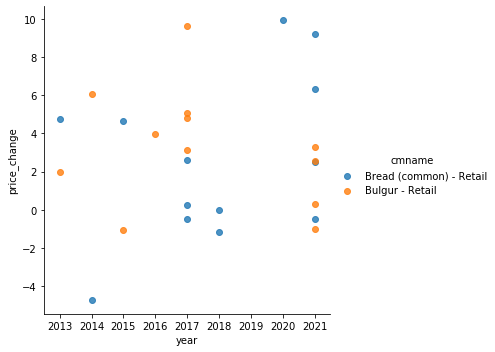

In [113]:
TFP_joinr = TFP_join.reset_index()

sns.lmplot(x='year', y ='price_change',hue ='cmname',
           data=TFP_joinr[(((TFP_joinr['cmname'] == 'Bread (common) - Retail' ) | (TFP_joinr['cmname'] == 'Bulgur - Retail' ))
                                        &(TFP_joinr['price_change'] > -10)&(TFP_joinr['price_change'] < 10))], fit_reg=False)

In [122]:
pd.unique(TFP_joinr['cmname'])
TFP_joinr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 8 columns):
year            1071 non-null int64
mktname         1071 non-null object
cmname          1071 non-null object
price_first     1071 non-null float64
date_first      1071 non-null object
price_last      1071 non-null float64
date_last       1071 non-null object
price_change    1071 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 67.1+ KB


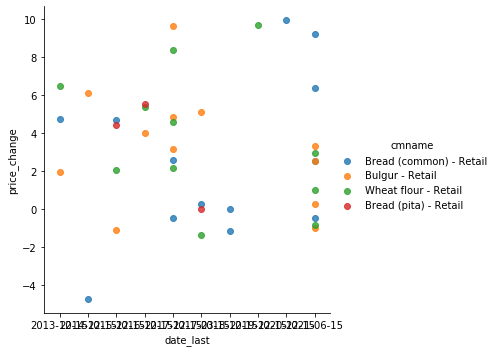

In [123]:
#compare  the price changes of Wheat and the products based on Wheat
lists = ['Bread (pita) - Retail','Wheat flour - Retail','Bulgur - Retail', 'Bread (common) - Retail']
sns.lmplot(x='date_last', y ='price_change',hue ='cmname',
           data=TFP_joinr[((TFP_joinr['cmname'].isin(lists))
                            &(TFP_joinr['price_change'] > -10)&(TFP_joinr['price_change'] < 10))], fit_reg=False)

As we can see on the chart, when the price change of wheat is under zero, the products based on Wheat prices increased or vice versa. This shows us that the product price changes is not only related with the price of based product but also related with the other costs, such as logistics, wages, electricity. 